### Santandar Data Test Submission

Santander Customer Satisfaction challenge from Kaggle has been chosen for the exercise.
I have chosen this exercise as identifying unsatisfied customers can be very helpful in terms of reducing churn and have significant commercial impact. 

https://www.kaggle.com/c/santander-customer-satisfaction/


In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc, make_scorer, recall_score, accuracy_score, precision_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')  
from IPython.display import display
pd.options.display.max_columns = None

In [16]:
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [18]:
data = pd.read_csv('train.csv')


In [3]:
data.head(n=5)

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
0                      0.0                      0.0                0.0   
1                      0.0                      0.0                0.0   
2                      0.0                      0.0                0.0   
3                      0.0                      0.0                0.0   
4                      0.0                      0.0                0.0   

   imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                    195.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
0                      0.0                0.0                      0.0   
1                      0.0                0.0                      0.0   
2                      0.0                0.0                      0.0   
3                      0.0              195.0                      0.0   
4                      0.0                0.0                      0.0   

   imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  ind_var1_0  \
0                      0.0                0.0                 0.0           0   
1                      0.0                0.0                 0.0           0   
2                      0.0                0.0                 0.0           0   
3                      0.0              195.0                 0.0           0   
4                      0.0                0.0                 0.0           0   

   ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  ind_var6_0  ind_var6  \
0         0           0         0           1         0           0         0   
1         0           0         0           1         0           0         0   
2         0           0         0           1         1           0         0   
3         0           0         0           1         1           0         0   
4         0           0         0           1         0           0         0   

   ind_var8_0  ind_var8  ind_var12_0  ind_var12  ind_var13_0  \
0           0         0            0          0            0   
1           0         0            0          0            1   
2           0         0            0          0            0   
3           0         0            0          0            0   
4           0         0            1          1            0   

   ind_var13_corto_0  ind_var13_corto  ind_var13_largo_0  ind_var13_largo  \
0                  0                0                  0                0   
1                  1                1                  0                0   
2                  0                0                  0                0   
3                  0                0                  0                0   
4   

###  Data Processing and Profiling

In [11]:
data.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
count             76020.000000             76020.000000       76020.000000   
mean                  0.412946                 0.567352           3.160715   
std                  30.604864                36.513513          95.268204   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max                6600.000000              6600.000000        8237.820000   

       imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  \
count             76020.000000             76020.000000   
mean                 68.803937               113.056934   
std                 319.605516               512.154823   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             16566.810000   

       imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  \
count             76020.000000             76020.000000       76020.000000   
mean                 68.205140               113.225058         137.242763   
std                 531.897917               950.086398         697.712596   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max               45990.000000            131100.000000       47598.090000   

       imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_op_var39_ult1  \
count             76020.000000             76020.000000       76020.000000   
mean                 68.618087               113.792410         140.403479   
std                 535.473750               953.578624         712.767240   
min                   0.000000                

In [19]:
data['var3'] = data['var3'].replace(-999999,2)

In [20]:
SingleDistinct = []
LowDistinctColumn = []

for column in data:
    if data[column].nunique() < 2:
        SingleDistinct.append(column)
    if data[column].nunique() < 5:
        LowDistinctColumn.append(column)
print('Number of columns with single value:', len(SingleDistinct))
print('Number of columns with less than 5 distinct values:',len(LowDistinctColumn))

Number of columns with single value: 34
Number of columns with less than 5 distinct values: 191


In [21]:
data.drop(SingleDistinct,axis=1,inplace=True)

In [22]:
targetvar = 'TARGET'

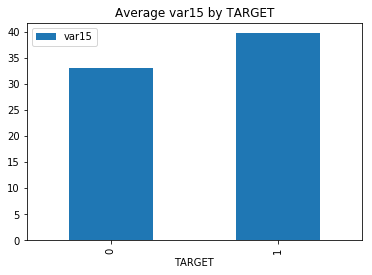

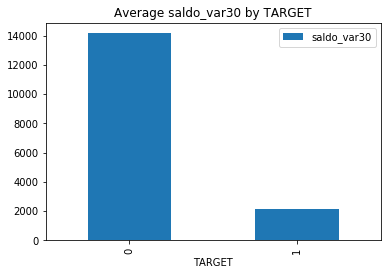

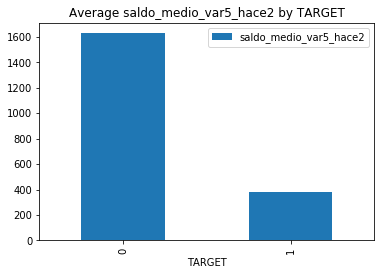

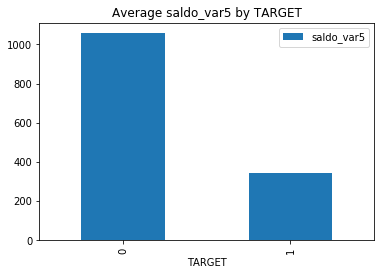

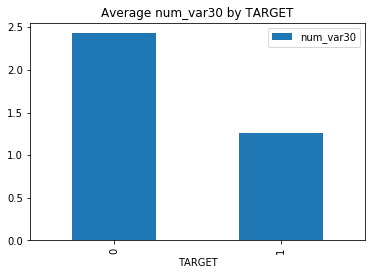

In [14]:
def pivottablebar(variable1,value):
    pivottable= pd.pivot_table(data, values=value,index=variable1,aggfunc='mean')
    pivottable[variable1] = pivottable.index
    pivottable.plot.bar(x=variable1,y=value,title='Average '+value + ' by ' + variable1)

visualizecolumns= ['var15','saldo_var30','saldo_medio_var5_hace2','saldo_var5','num_var30']

for column in visualizecolumns:
    pivottablebar(targetvar,column)

In [23]:
data.drop('ID',axis=1,inplace=True)

In [24]:
corr_matrix = data.corr(method='pearson')

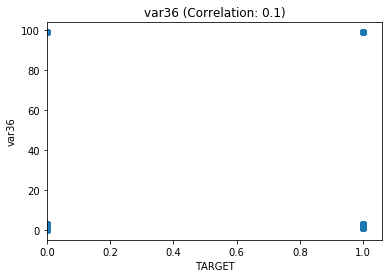

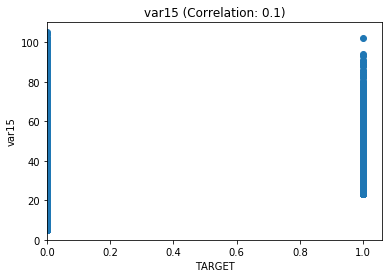

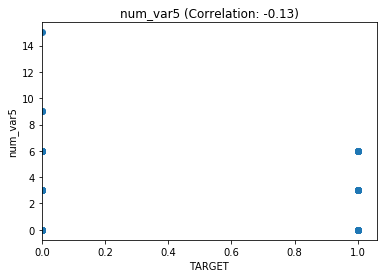

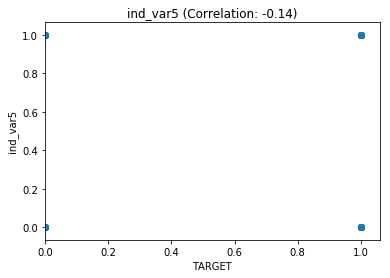

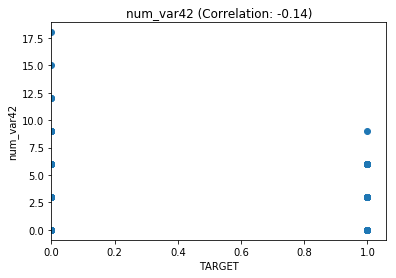

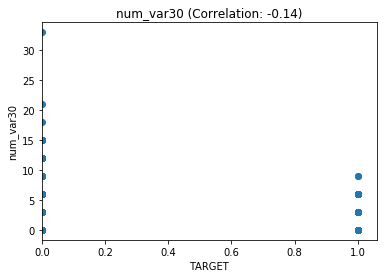

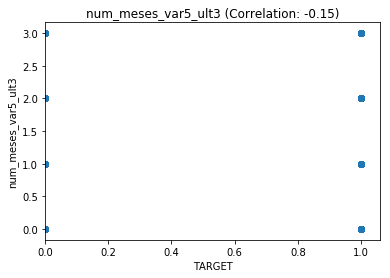

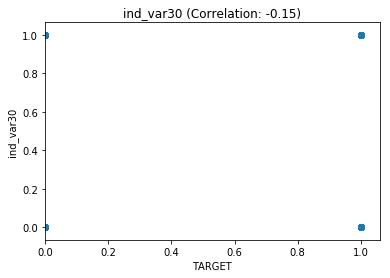

In [25]:
#Delete correlation with self for Sales Price
corr_matrix = corr_matrix.drop([targetvar])
#Calculate correlation with Sales Price in descending order
corr_matrix[targetvar].sort_values(ascending=False)

ass_corr = corr_matrix[targetvar].sort_values(ascending=False)

#Plot sales price and predictor variable in scatter plot if correlation is over either positive or negative %5 
for i in range(len(ass_corr)):
    if ((ass_corr[i] > 0.10) | (ass_corr[i] < -0.10)): 
        plt.scatter(data[targetvar], data[ass_corr.index[i]])
        plt.xlabel(targetvar)
        plt.title(ass_corr.index[i] + ' (Correlation: ' + str(round(ass_corr[i],2)) +')')
        plt.ylabel(ass_corr.index[i])
        #plt.xticks(np.arange(0, max(data[targetvar].values), 150000))
        plt.xlim(0)
        plt.show()

In [26]:
#Remove variables that are very highly correlated
for column in corr_matrix:
    try:
        temp = corr_matrix[corr_matrix[column] > 0.85]
        temp.drop(column,inplace=True)
        corr_matrix.drop(temp.index.values,axis=1,inplace=True)
    except:
        pass

In [14]:
corr_matrix.shape

(335, 161)

In [27]:
data = data.filter(list(corr_matrix.columns.values))

###  Data cleaning and processing

Drop duplicates:

In [17]:
data.shape

(76020, 161)

In [18]:
data = data.drop_duplicates()
data.shape

(70895, 161)

I have observed through exploratory analysis that a number of variables can potentially be good predictive variables in terms of determining whether a person would be an unsatisfied customer. 

I excluded many variables from the modelling since they are very highly correlated which still leaves about 161 variables to be included in the predictive modelling stage. 

If we had many more uncorrelated variables in the data set, we could use a stepwise approach to determine which variables to select for analysis. In the backward stepwise approach, we can build an initial model and progressively remove the variables that has least predictive power (feature importance). Or with the forward stepwise approach, we can build a model without any variables, then progressively add the variable that adds the most predictive power.   

###  Data modelling

In [27]:
#Split data into training and validation datasets

targets = data[targetvar]
x_train, x_test, y_train, y_test = train_test_split(data, targets, stratify=targets)

x_train.drop([targetvar],axis=1,inplace=True)
x_test.drop([targetvar],axis=1,inplace=True)


Baseline accuracy:

In [28]:
dist = float(y_train.value_counts().max())/y_train.value_counts().sum()
print("Distribution of Target variable: ", np.round(dist,2))

Distribution of Target variable:  0.96


#### Logistic regression:

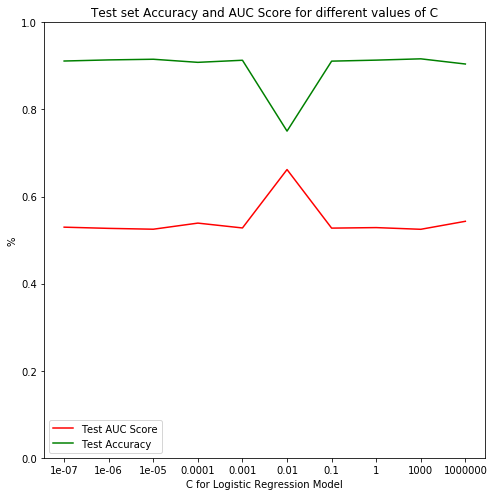

Test set AUC is maximum at C value of 0.01 and yields AUC score of 0.66


In [26]:
c = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1, 1, 1000, 1000000]

test_acc = []
test_auc = []

for i in c:
    logit = LogReg( C = i, class_weight='balanced')
    logit.fit(x_train, y_train)
    # make the predictions
    y_pred = logit.predict(x_test.values)
    
    test_acc.append(logit.score(x_test, y_test))
    test_auc.append(roc_auc_score(y_test, y_pred))

#%%
#Visualize accuracy for different regularization parameters
plt.figure(figsize=(7,7))
plt.plot(test_auc, color='r', label='Test AUC Score')
plt.plot(test_acc, color='g', label='Test Accuracy')
plt.xticks(range(10), c)
plt.xlabel('C for Logistic Regression Model')
plt.ylabel('%')
plt.ylim(0,1)
plt.title('Test set Accuracy and AUC Score for different values of C')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print('Test set AUC is maximum at C value of', c[np.argmax(test_auc)],'and yields AUC score of', round(max(test_auc), 2))


#### Random Forest

In [30]:
clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

param_grid = {
    'min_samples_split' : [10,20,30],
    'n_estimators' : [100, 300],
    'max_depth': [5, 10],
    'max_features': [10, 30, 50]
}

scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'log_loss': make_scorer(log_loss),
    'roc_auc_score': make_scorer(roc_auc_score)
}

In [31]:
def grid_search_wrapper(refit_score):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    kf = KFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score, cv=kf,
                            return_train_score=True,  n_jobs=-1)
    grid_search.fit(x_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(x_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('AUC Score: ', roc_auc_score(y_test, y_pred))
    return grid_search

In [32]:
grid_search_auc = grid_search_wrapper('roc_auc_score')

Best params for roc_auc_score
{'max_depth': 5, 'max_features': 50, 'min_samples_split': 20, 'n_estimators': 300}

Confusion matrix of Random Forest optimized for roc_auc_score on the test data:
     pred_neg  pred_pos
neg     14914      3339
pos       220       532
Accuracy Score:  0.8127334911865298
AUC Score:  0.7622589874471233


In [ ]:
RFC = RandomForestClassifier()
RFC.set_params(class_weight='balanced', n_estimators=100,max_depth= 5, max_features= 50, min_samples_split= 20)
RFC.fit(x_train,y_train)
R2_rfc = RFC.score(x_test,y_test) 

In [44]:
#Find out most important variables
importance = RFC.feature_importances_
importance = pd.DataFrame(importance, index=x_train.columns, 
                          columns=["Importance"])
importance["Std"] = np.std([tree.feature_importances_
                            for tree in RFC.estimators_], axis=0)

importance['Importance'].sort_values(ascending=False).head(n=20)

var15                      0.348502
saldo_var30                0.180537
saldo_medio_var5_hace2     0.084138
saldo_var5                 0.054618
num_var30                  0.044844
saldo_medio_var5_hace3     0.035468
var38                      0.031701
saldo_medio_var5_ult1      0.028743
num_var4                   0.026208
saldo_medio_var5_ult3      0.021795
num_var30_0                0.014639
imp_op_var41_efect_ult3    0.013724
imp_op_var41_efect_ult1    0.013513
var36                      0.011664
num_var22_ult3             0.010609
num_var22_ult1             0.005440
num_var45_hace3            0.005117
var3                       0.004676
saldo_var12                0.004604
num_var42_0                0.004259
Name: Importance, dtype: float64

#### XGBoost

In [29]:
import xgboost as xgb

xgbmod = xgb.XGBClassifier(max_depth = 5,
                n_estimators=1000,
                learning_rate=0.01, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                scale_pos_weight = dist,
                reg_alpha=0.03) 
                      
xgbmod.fit(x_train, y_train, eval_metric="auc", early_stopping_rounds=100, eval_set=[(x_train, y_train), (x_test, y_test)])  
R2_xgb = xgbmod.score(x_test,y_test) 

[0]	validation_0-auc:0.748388	validation_1-auc:0.755573
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.751577	validation_1-auc:0.760481
[2]	validation_0-auc:0.755107	validation_1-auc:0.763641
[3]	validation_0-auc:0.793802	validation_1-auc:0.798698
[4]	validation_0-auc:0.810308	validation_1-auc:0.816646
[5]	validation_0-auc:0.815296	validation_1-auc:0.820916
[6]	validation_0-auc:0.812793	validation_1-auc:0.819133
[7]	validation_0-auc:0.810814	validation_1-auc:0.815423
[8]	validation_0-auc:0.810485	validation_1-auc:0.814547
[9]	validation_0-auc:0.809644	validation_1-auc:0.813403
[10]	validation_0-auc:0.807353	validation_1-auc:0.811453
[11]	validation_0-auc:0.805614	validation_1-auc:0.809885
[12]	validation_0-auc:0.806223	validation_1-auc:0.809957
[13]	validation_0-auc:0.808939	validation_1-auc:0.812824
[14]	validation_0-auc:0.812802	validation_1-auc:0.8160

[141]	validation_0-auc:0.833806	validation_1-auc:0.83556
[142]	validation_0-auc:0.833031	validation_1-auc:0.835165
[143]	validation_0-auc:0.832728	validation_1-auc:0.834858
[144]	validation_0-auc:0.832451	validation_1-auc:0.834749
[145]	validation_0-auc:0.83219	validation_1-auc:0.834419
[146]	validation_0-auc:0.831902	validation_1-auc:0.834056
[147]	validation_0-auc:0.832714	validation_1-auc:0.834646
[148]	validation_0-auc:0.833003	validation_1-auc:0.834842
[149]	validation_0-auc:0.832952	validation_1-auc:0.834808
[150]	validation_0-auc:0.833362	validation_1-auc:0.834895
[151]	validation_0-auc:0.833993	validation_1-auc:0.835411
[152]	validation_0-auc:0.8346	validation_1-auc:0.835576
[153]	validation_0-auc:0.835173	validation_1-auc:0.836001
[154]	validation_0-auc:0.835781	validation_1-auc:0.836375
[155]	validation_0-auc:0.83603	validation_1-auc:0.836704
[156]	validation_0-auc:0.836351	validation_1-auc:0.837016
[157]	validation_0-auc:0.836241	validation_1-auc:0.836778
[158]	validation_0-

[283]	validation_0-auc:0.84724	validation_1-auc:0.843727
[284]	validation_0-auc:0.847371	validation_1-auc:0.844055
[285]	validation_0-auc:0.847541	validation_1-auc:0.844306
[286]	validation_0-auc:0.847602	validation_1-auc:0.844211
[287]	validation_0-auc:0.847777	validation_1-auc:0.84447
[288]	validation_0-auc:0.84805	validation_1-auc:0.844672
[289]	validation_0-auc:0.847997	validation_1-auc:0.844523
[290]	validation_0-auc:0.847913	validation_1-auc:0.844337
[291]	validation_0-auc:0.847964	validation_1-auc:0.844247
[292]	validation_0-auc:0.848149	validation_1-auc:0.844428
[293]	validation_0-auc:0.848386	validation_1-auc:0.844661
[294]	validation_0-auc:0.848256	validation_1-auc:0.844562
[295]	validation_0-auc:0.848189	validation_1-auc:0.844509
[296]	validation_0-auc:0.848469	validation_1-auc:0.844712
[297]	validation_0-auc:0.848424	validation_1-auc:0.844703
[298]	validation_0-auc:0.848573	validation_1-auc:0.844817
[299]	validation_0-auc:0.848556	validation_1-auc:0.84472
[300]	validation_0

[425]	validation_0-auc:0.859231	validation_1-auc:0.850464
[426]	validation_0-auc:0.85925	validation_1-auc:0.850443
[427]	validation_0-auc:0.859328	validation_1-auc:0.850541
[428]	validation_0-auc:0.859434	validation_1-auc:0.850614
[429]	validation_0-auc:0.859544	validation_1-auc:0.85065
[430]	validation_0-auc:0.859629	validation_1-auc:0.850764
[431]	validation_0-auc:0.859737	validation_1-auc:0.850838
[432]	validation_0-auc:0.859821	validation_1-auc:0.850913
[433]	validation_0-auc:0.859937	validation_1-auc:0.850947
[434]	validation_0-auc:0.860013	validation_1-auc:0.850966
[435]	validation_0-auc:0.860086	validation_1-auc:0.851051
[436]	validation_0-auc:0.860139	validation_1-auc:0.851047
[437]	validation_0-auc:0.860164	validation_1-auc:0.851024
[438]	validation_0-auc:0.860222	validation_1-auc:0.851063
[439]	validation_0-auc:0.860275	validation_1-auc:0.851071
[440]	validation_0-auc:0.860334	validation_1-auc:0.851032
[441]	validation_0-auc:0.860417	validation_1-auc:0.851061
[442]	validation

[567]	validation_0-auc:0.867116	validation_1-auc:0.853079
[568]	validation_0-auc:0.86717	validation_1-auc:0.853108
[569]	validation_0-auc:0.867226	validation_1-auc:0.8531
[570]	validation_0-auc:0.867281	validation_1-auc:0.853116
[571]	validation_0-auc:0.867329	validation_1-auc:0.853131
[572]	validation_0-auc:0.867345	validation_1-auc:0.853129
[573]	validation_0-auc:0.867395	validation_1-auc:0.853151
[574]	validation_0-auc:0.867453	validation_1-auc:0.853161
[575]	validation_0-auc:0.867487	validation_1-auc:0.853194
[576]	validation_0-auc:0.867549	validation_1-auc:0.85321
[577]	validation_0-auc:0.867597	validation_1-auc:0.853213
[578]	validation_0-auc:0.867658	validation_1-auc:0.853233
[579]	validation_0-auc:0.867691	validation_1-auc:0.85324
[580]	validation_0-auc:0.867742	validation_1-auc:0.853242
[581]	validation_0-auc:0.867792	validation_1-auc:0.853249
[582]	validation_0-auc:0.867802	validation_1-auc:0.853255
[583]	validation_0-auc:0.867847	validation_1-auc:0.853263
[584]	validation_0-

[709]	validation_0-auc:0.872094	validation_1-auc:0.853763
[710]	validation_0-auc:0.872102	validation_1-auc:0.853765
[711]	validation_0-auc:0.872156	validation_1-auc:0.853785
[712]	validation_0-auc:0.872174	validation_1-auc:0.853787
[713]	validation_0-auc:0.872214	validation_1-auc:0.853767
[714]	validation_0-auc:0.872224	validation_1-auc:0.853774
[715]	validation_0-auc:0.872256	validation_1-auc:0.853766
[716]	validation_0-auc:0.872279	validation_1-auc:0.85377
[717]	validation_0-auc:0.872322	validation_1-auc:0.853758
[718]	validation_0-auc:0.872339	validation_1-auc:0.853779
[719]	validation_0-auc:0.872385	validation_1-auc:0.853779
[720]	validation_0-auc:0.872391	validation_1-auc:0.853785
[721]	validation_0-auc:0.87242	validation_1-auc:0.853761
[722]	validation_0-auc:0.872432	validation_1-auc:0.853766
[723]	validation_0-auc:0.872441	validation_1-auc:0.853767
[724]	validation_0-auc:0.872448	validation_1-auc:0.853772
[725]	validation_0-auc:0.87248	validation_1-auc:0.853769
[726]	validation_

In [30]:
y_scores = xgbmod.predict_proba(x_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)

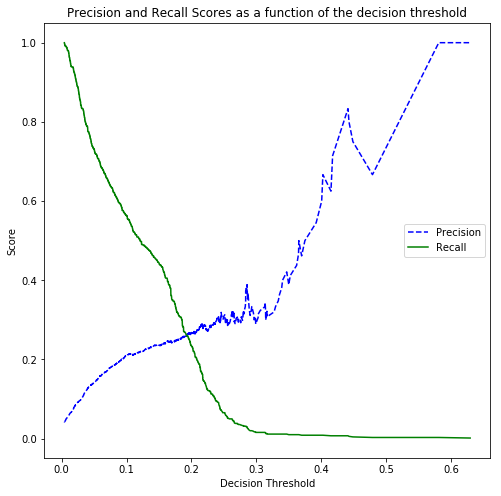

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(p, r, thresholds)

0.8538405783233379


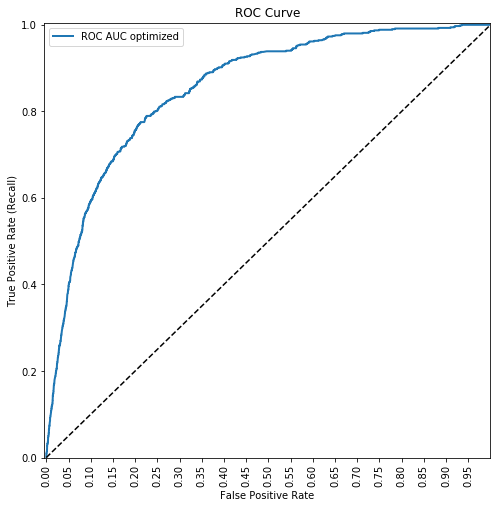

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'ROC AUC optimized')

I have chosen XGBoost model with AUC as the optimization metric as it performed the best with 85.3% AUC compared to Logistic Regression and Random Forest. The ROC AUC Curve and  precision/recall decision thresholds can be used to set thresholds for prediction. 

In order to build a better model, following steps can be taken:
- Do more exploratory analysis and possible feature engineering to add new variables. It would be very helpful to know the meaning of each variable. Dimensionality reduction techniques such as PCA can also be used to generate new features. 
- Further tune XGBoost model and create an ensemble/stacking of models as an ensemble model using the prediction probabilities from each model will likely achieve best performance. 

Thank you!
